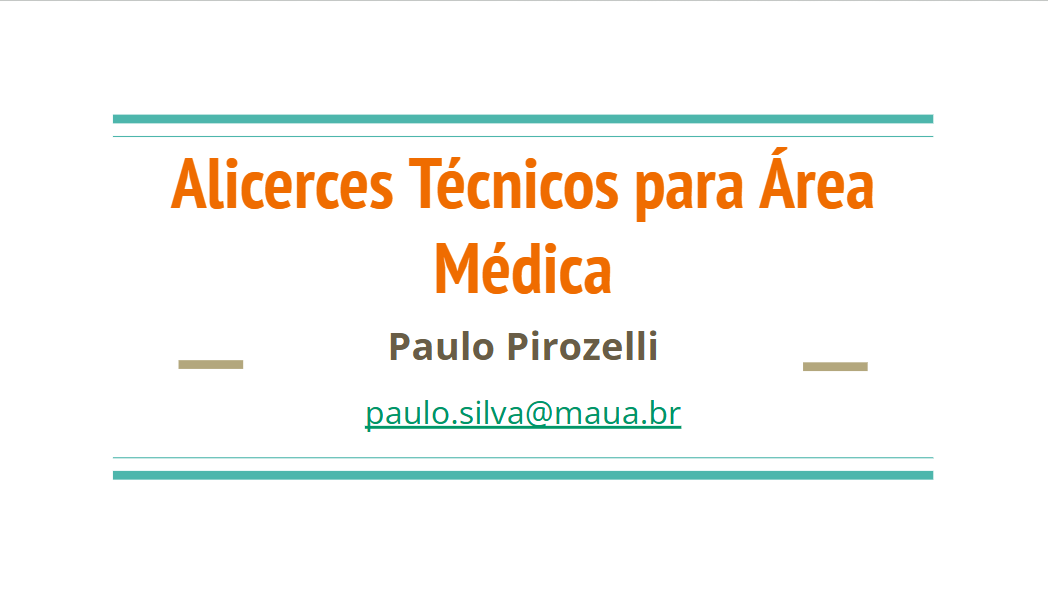

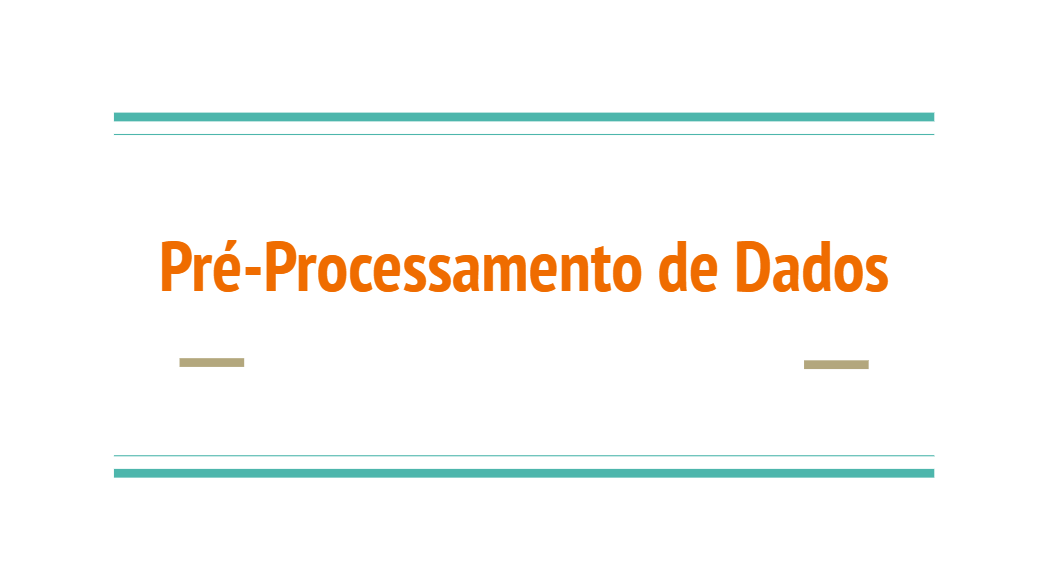

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np

## Motivação

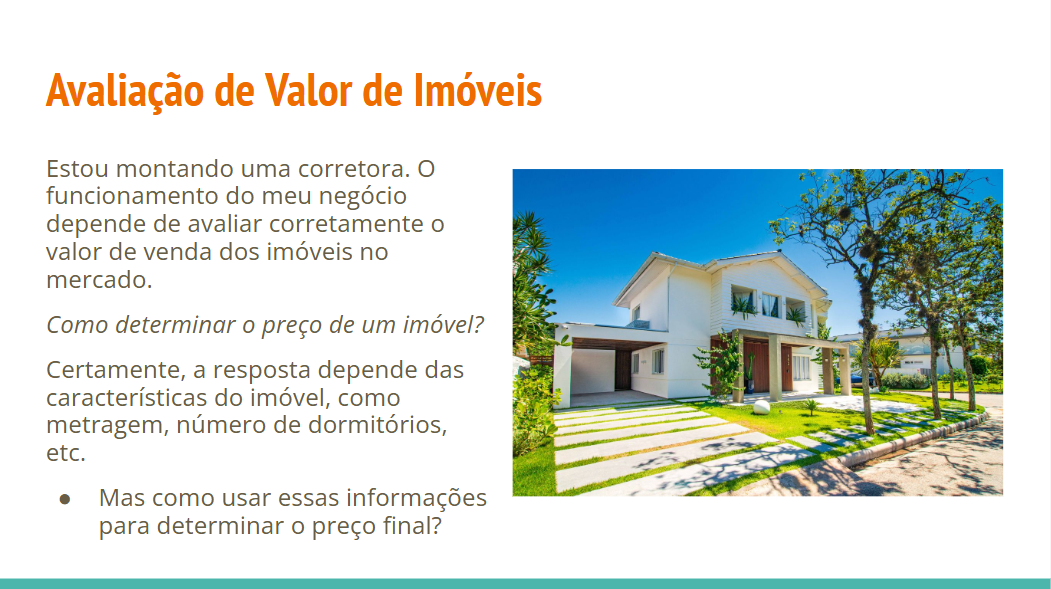

## Workflow de Machine Learning

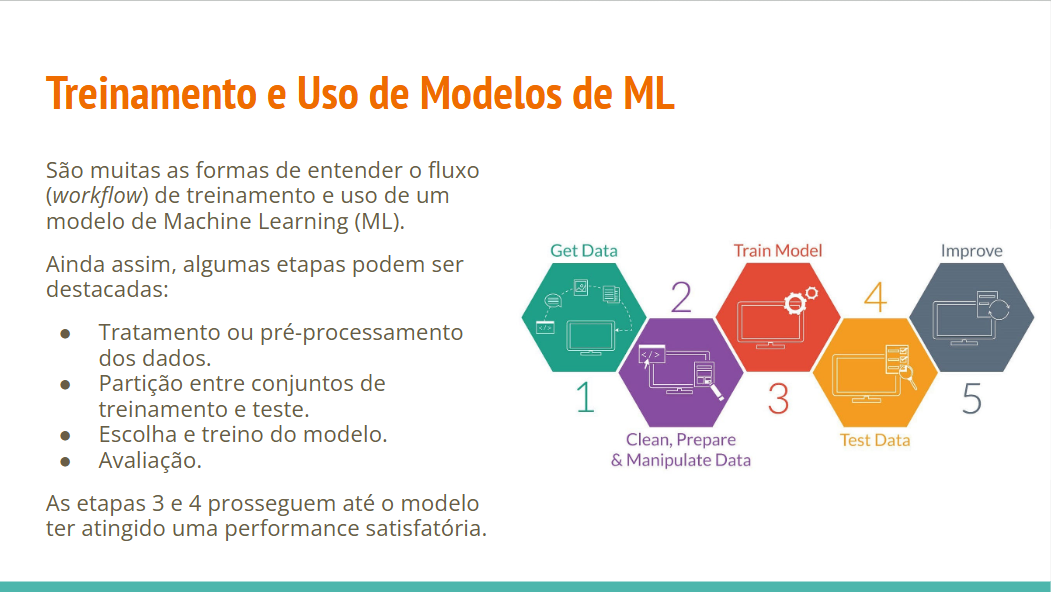

## Aquisição de dados

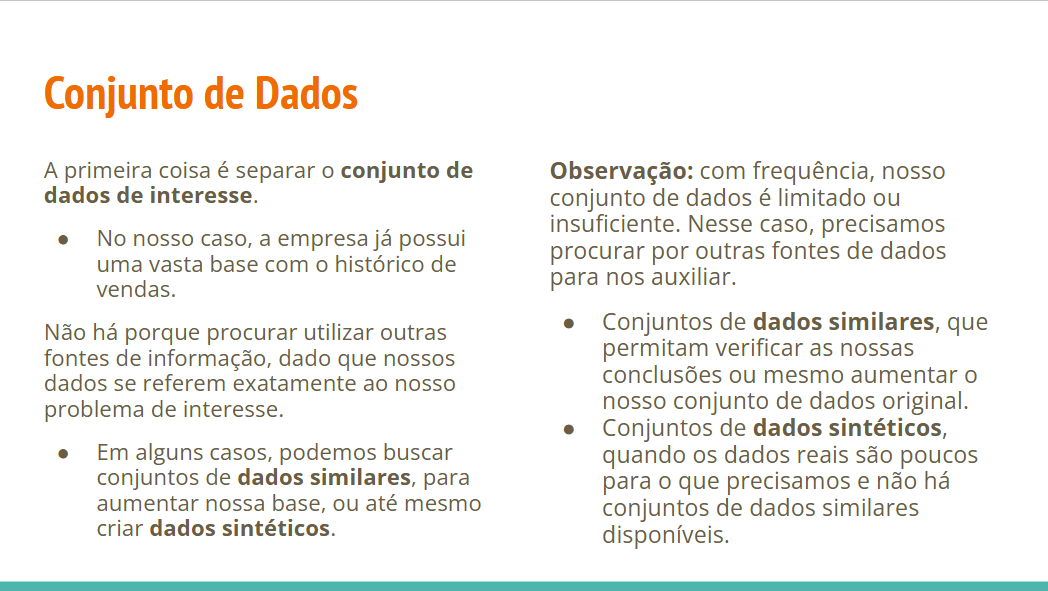

## Importação de Dados

Para começar, vamos abrir o conjunto de dados no nosso programa.

Este conjunto de dados contém preços de venda de casas em King County, nos EUA, o que inclui a cidade de Seattle. As casas foram vendidas entre maio de 2014 e maio de 2015.



In [ ]:
df = pd.read_csv('houses.csv')

print('Tamanho do dataset:', df.shape)

df.head()

Tamanho do dataset: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Podemos imprimir o nome das colunas para ver melhor o tipo de informação que o dataset contém.

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Podemos também inspecionar os tipos de variáveis que o dataset contém.

In [ ]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


**Documentação:** https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

Depois de entender melhor a estrutura do nosso conjunto de dados, podemos começar a estruturar melhor nosso problema.


*   **Pergunta 1:** Qual a variável mais importante do nosso conjunto de dados?
*   **Pergunta 2:** Como esse problema é descrito em aprendizado de máquina?



Para facilitar, vamos utilizar somente algumas variáveis, que parecem ser especialmente importantes.

In [ ]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'yr_renovated']]

## Estatísticas Descritivas

Para começar, podemos inspecionar as estatísticas descritivas do nosso dataset.

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,yr_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,3.409430,1971.005136,84.402258
std,3.671272e+05,0.930062,0.770163,918.440897,0.650743,29.373411,401.679240
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,3.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,3.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,4.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,5.000000,2015.000000,2015.000000


Vamos visualizar a distribuição da variável 'price'.

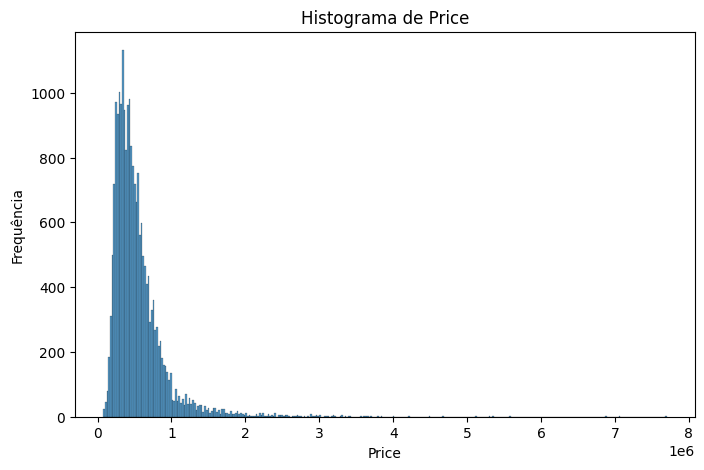

In [ ]:
# Plotando o histograma de price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'])
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frequência')
plt.show()

E um boxplot

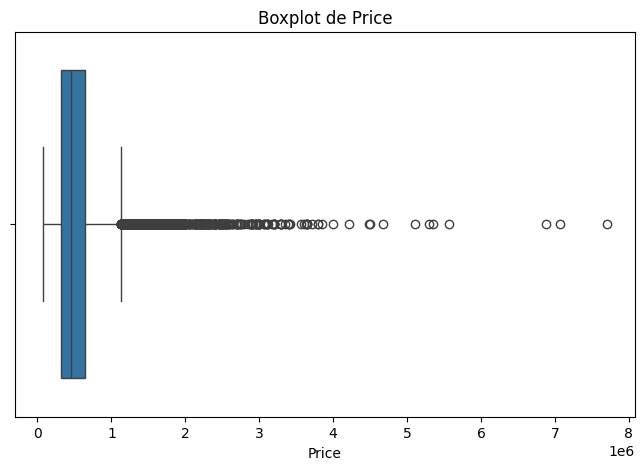

In [ ]:
# Plotando um boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot de Price')
plt.xlabel('Price')
plt.show()

## Pré-processamento

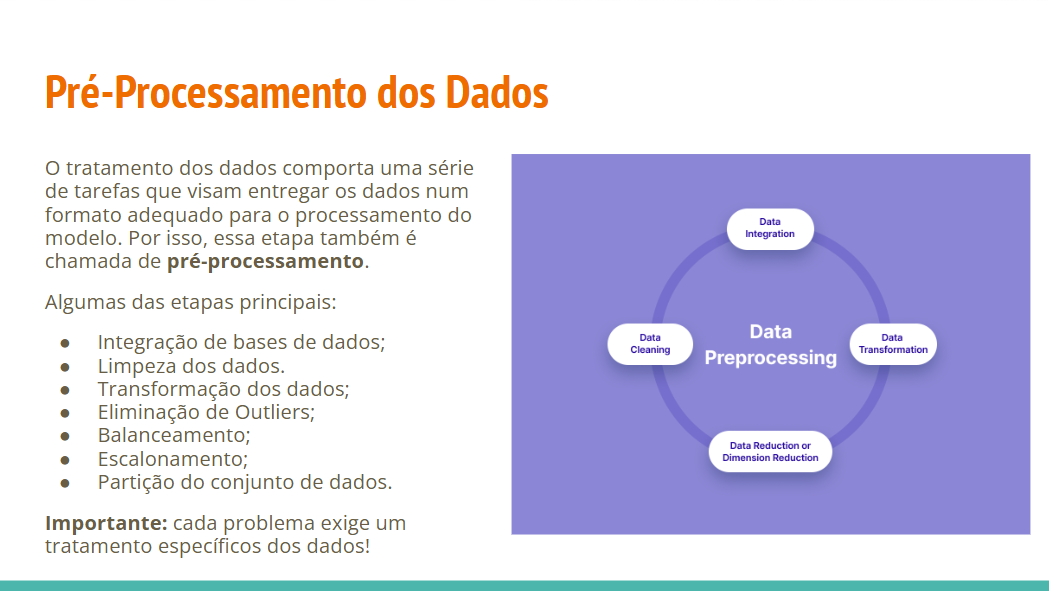

#### 1. Integração de Bases de Dados

Nosso dataset já contém todas as informações. Não foi preciso integrar diferentes bases.

#### 2. Limpeza dos Dados

Com frequência, os dados que possuímos apresentam uma série de problemas: formato inadequado, valores faltantes, erros de digitação, entre outros problemas. Antes de pensar em treinar um modelo, é necessário garantir que os dados se encontram num formato adequado.

Um exemplo são dados faltantes. Dados faltantes podem ser um problema sério para vários tipos de modelos, impedindo que possam rodar. Vamos checar se há valores faltantes e se houver, vamos removê-los.



In [ ]:
# Verificar valores faltantes
print("Valores faltantes antes da remoção:")
print(df.shape)
print(df.isnull().sum())

Valores faltantes antes da remoção:
(21613, 7)
price           0
bedrooms        0
bathrooms       0
sqft_living     0
condition       0
yr_built        0
yr_renovated    0
dtype: int64


Não há nenhum dando faltante no nosso conjunto de dados, então não precisamos fazer nenhuma modificação nesse sentido.

Por outro lado, algumas das variáveis precisam ser modificadas. Esse é um trabalho quase manual muito comum para o trabalho do cientista de dados.



A variável 'yr_renovated' indica o ano em que a casa foi renovada pela última vez. O problema é que para as casas que nunca foram renovadas, o ano apresentado é 0.

Para resolver essa inconsistência, vamos transformar essa variável em uma variável binária, que indica se a casa foi renovada ou não.

In [ ]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

A idade da casa ('yr_built') indica quando a casa foi construída. Com isso, os valores ficam numa faixa muito estreita.

Em vez disso, vamos construir uma variável que indique a idade da casa.

In [ ]:
df['age'] = 2015 - df['yr_built']

Feito isso, precisamos remover as colunas antigas.

In [ ]:
columns_remover = ['yr_built', 'yr_renovated']

df = df.drop(columns=columns_remover)

df.head()

,price,bedrooms,bathrooms,sqft_living,condition,renovated,age
0,221900.0,3,1.00,1180,3,0,60
1,538000.0,3,2.25,2570,3,1,64
2,180000.0,2,1.00,770,3,0,82
3,604000.0,4,3.00,1960,5,0,50
4,510000.0,3,2.00,1680,3,0,28


#### 3. Tipos de variáveis

Dependendo dos tipos de variáveis que temos no conjunto de dados, podemos precisar transformar essas variáveis.

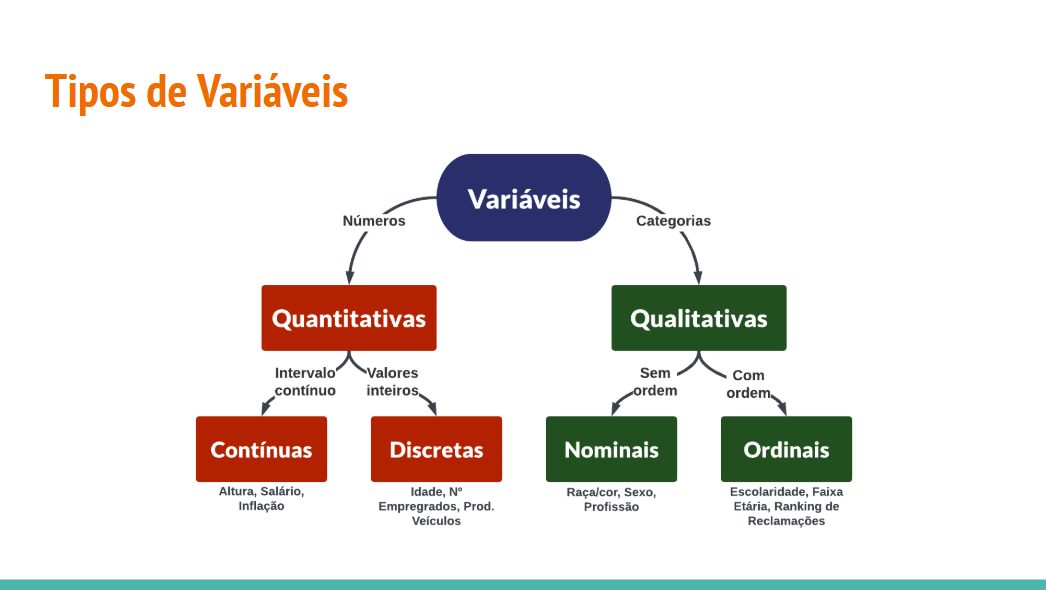

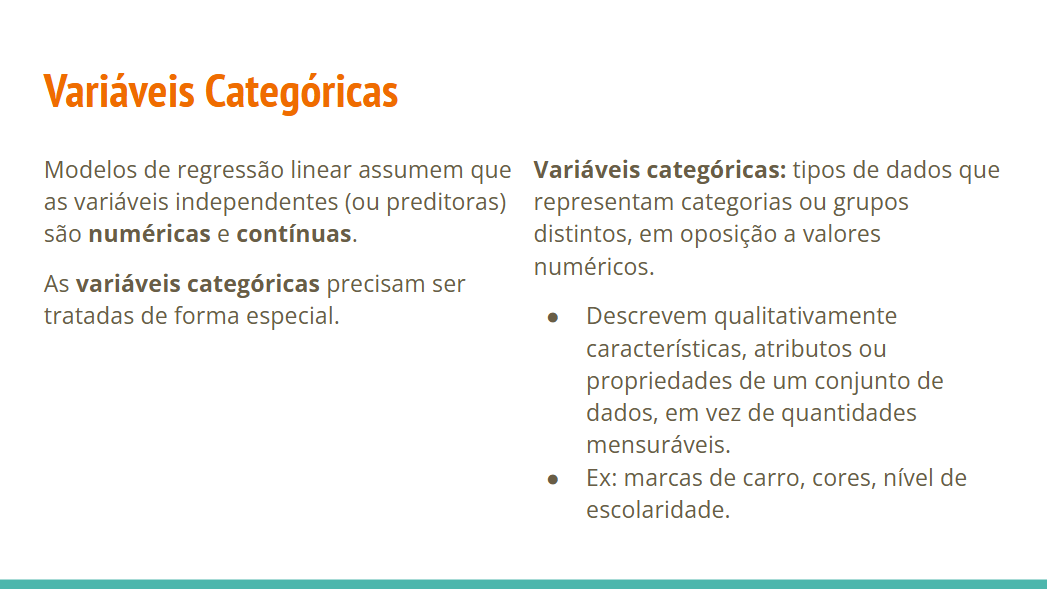

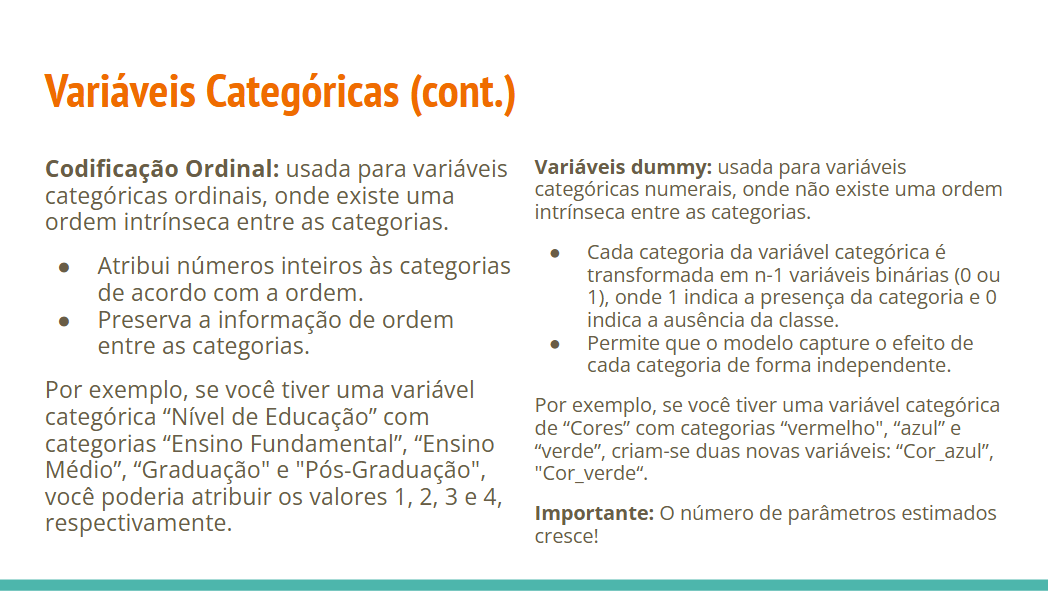

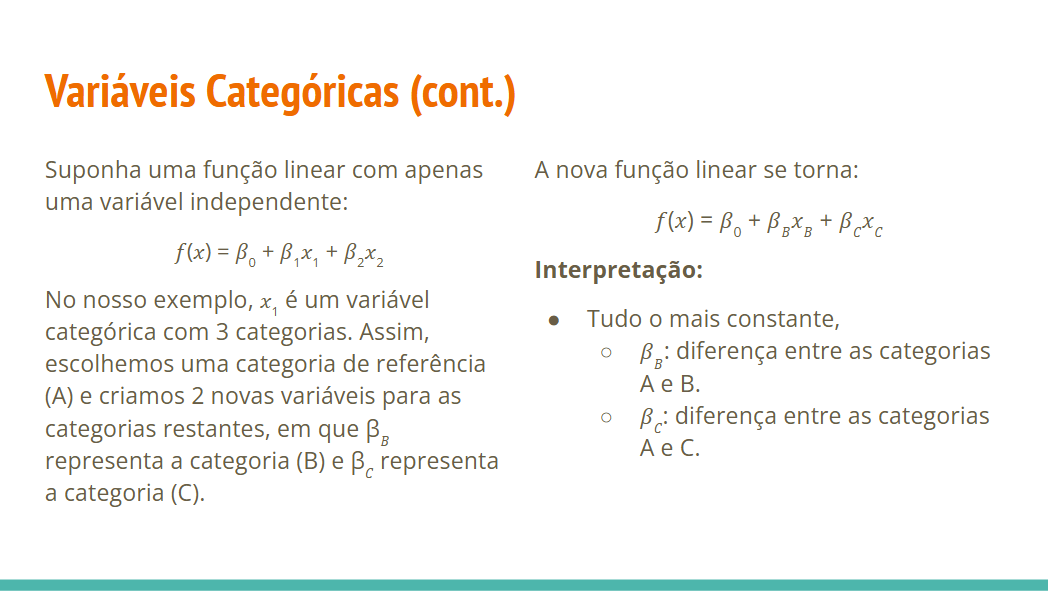

#### 4. Outliers

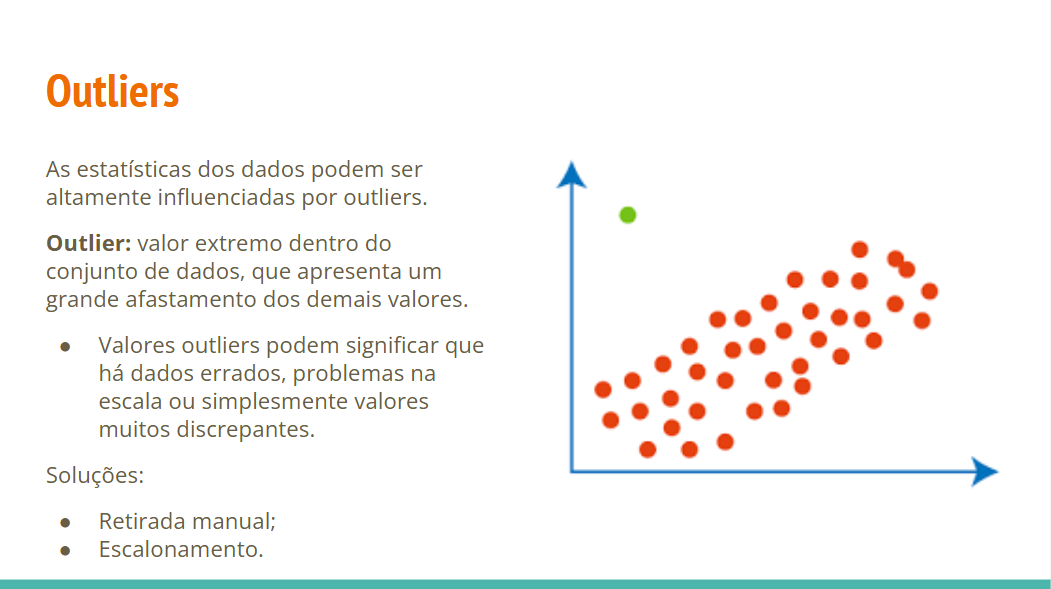

Vou plotar o boxplot de todas as variáveis para analizar a distribuição dos dados.

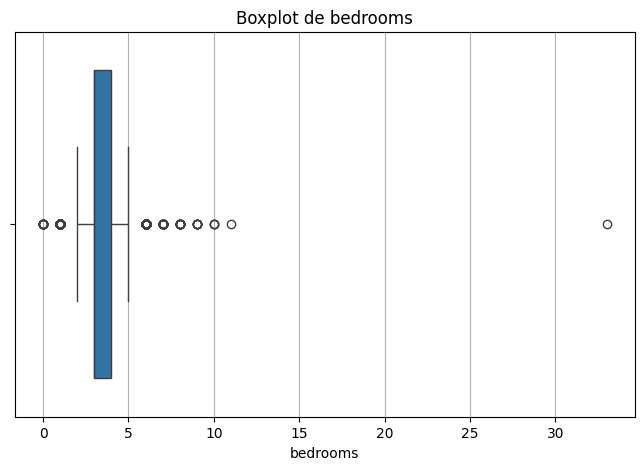

In [ ]:
# Criando um boxplot para uma variável do dataset
column = 'bedrooms'

plt.figure(figsize=(8, 5))
sns.boxplot(x=df[column])
plt.title(f'Boxplot de {column}')
plt.xlabel(column)
plt.grid(axis='x')
plt.show()

A coluna 'bedroom' tem um único valor que claramente se distancia dos demais. Isso pode ser causado por um erro na leitura dos dados, erro de digitação, ou simplesmente uma observação diferente das demais.

Esses dados extremos podem ter um grande impacto nas conclusões do nosso modelo. Por esse motivo, é comum eliminá-los da análise.

Aqui vamos remover o outlier manualmente.

In [ ]:
df = df[df['bedrooms'] <= 30]

Vejamos o novo boxplot.

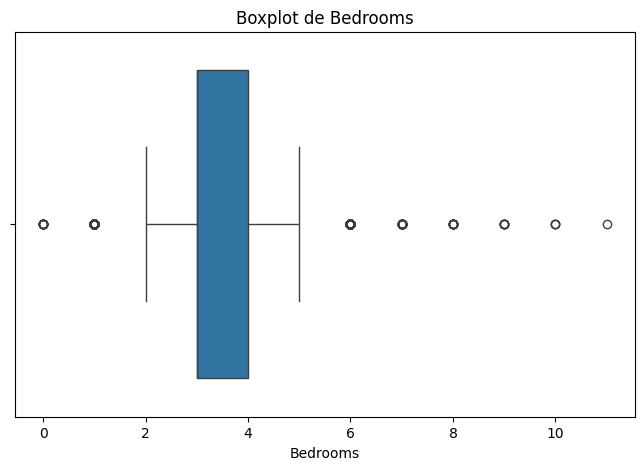

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot de Bedrooms')
plt.xlabel('Bedrooms')
plt.show()

#### 5. Balanceamento de Dados

Em tarefas de classificação, é preciso garantir que as classes sejam igualmente representadas (ou algo próximo disso). De outra forma, o modelo pode se preocupar demais com a classe majoritária e deixar de lado a classe minoritária.

Como esse é um problema de regressão, não vamos nos ocupar desse tratamento. Isso será importante a partir da próxima aula, quando abordarmos problemas de **classificação**.

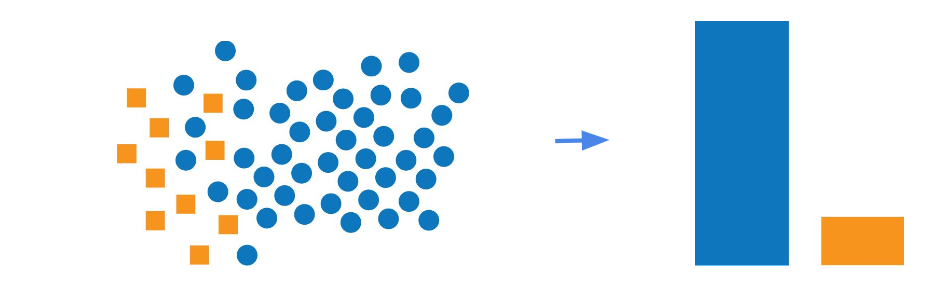

### 6. Escalonamento

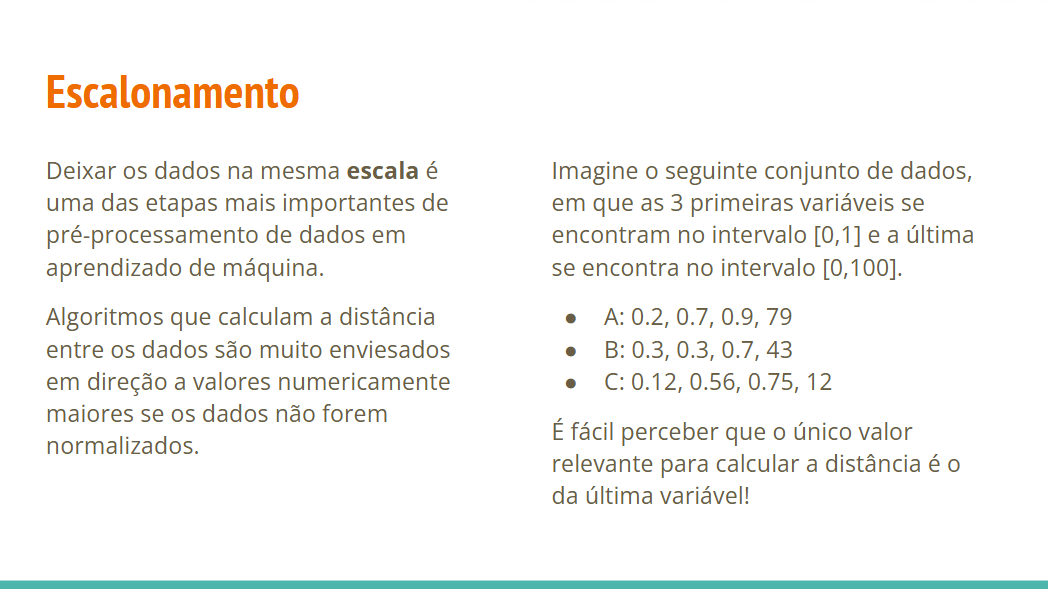

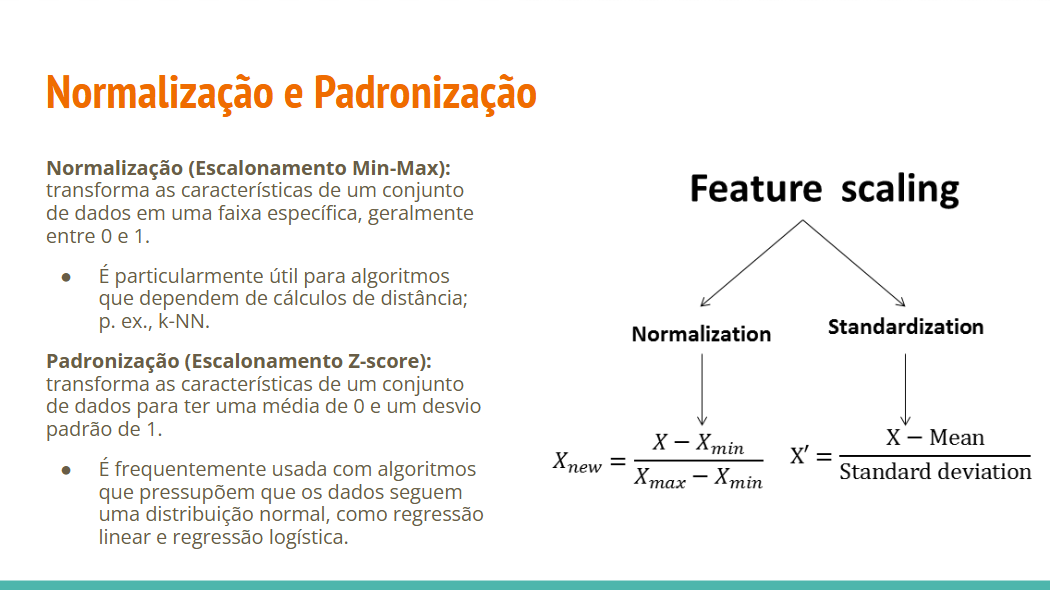

Vamos fazer um escalonamento z-score nos nossos dados.

Antes, vamos separar nossos dados de entrada e saída (não queremos normalizar os dados de saída). Depois vamos juntar com os dados de entrada normalizados.

In [ ]:
# Separando a variável alvo e as features
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
# Normalizando apenas as features
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

# Convertendo as features normalizadas de volta para um DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Adicionando a variável de saída (price) de volta ao dataset
df = X_normalized.copy()
df['price'] = y.reset_index(drop=True)

df.head()

,bedrooms,bathrooms,sqft_living,condition,renovated,age,price
0,-0.406924,-1.447460,-0.979841,-0.629146,-0.21014,0.544931,221900.0
1,-0.406924,0.175582,0.533602,-0.629146,4.75873,0.681111,538000.0
2,-1.508293,-1.447460,-1.426252,-0.629146,-0.21014,1.293920,180000.0
3,0.694446,1.149406,-0.130571,2.444688,-0.21014,0.204482,604000.0
4,-0.406924,-0.149027,-0.435437,-0.629146,-0.21014,-0.544506,510000.0


### 7. Partição do dataset

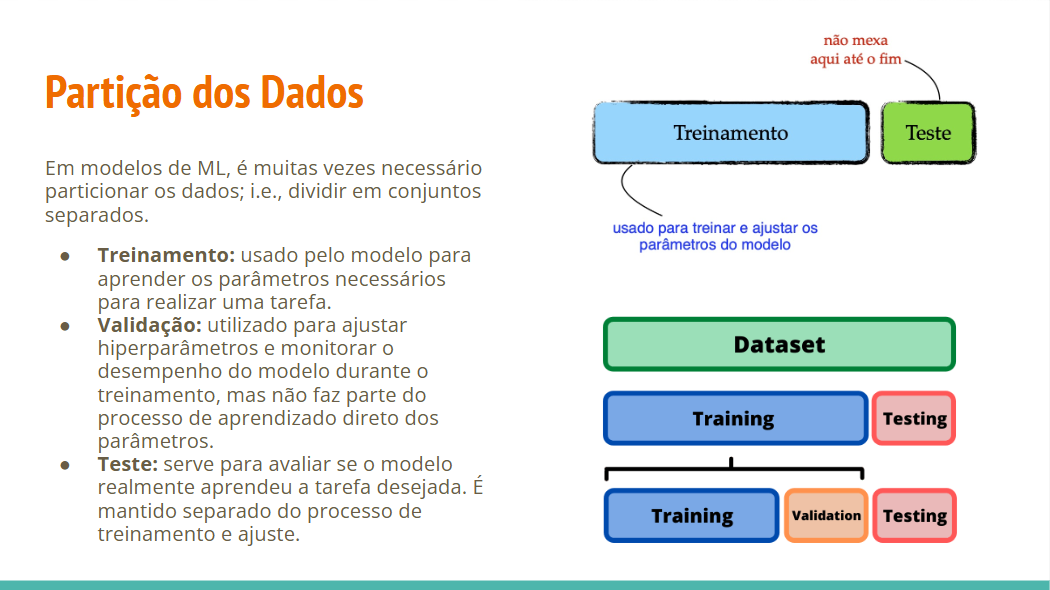

Vamos separar em conjunto de treinamento (que o modelo usa para aprender parâmetros) e conjunto teste (que usamos para medir o poder de generalização do modelo.

In [ ]:
# Dividindo o dataset em 80% treino e 20% teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {len(train_df)}")
print(f"Tamanho do conjunto de teste: {len(test_df)}")

Tamanho do conjunto de treino: 17289
Tamanho do conjunto de teste: 4323


## Regressão Linear

Com o nosso conjunto de dados pré-processado, podemos passsar para a etapa seguinte de modelagem. Como esta é uma tarefa de regressão, utilizaremos um modelo de **regressão linear**.

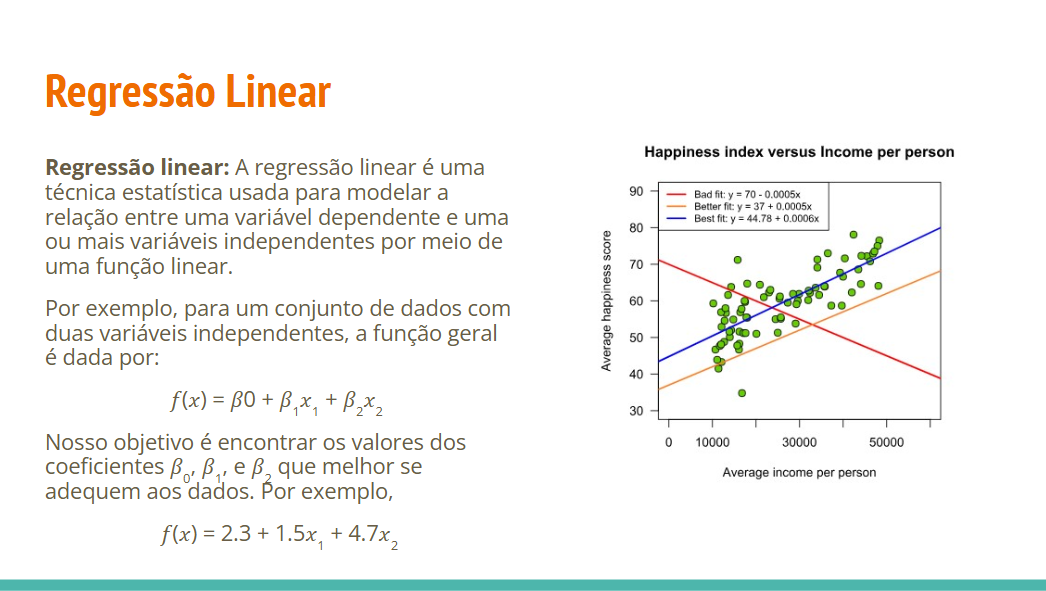

Vamos estimar uma regressão linear para o nosso problema de imóveis.

In [ ]:
# Definindo e ajustando um modelo de regressão
model = smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living + condition + renovated + age',
                data=train_df).fit()

Precisamos agora entender o resultado dessa regressão. Para isso, podemos imprimir um sumário dos resultados.

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3618.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:28:04   Log-Likelihood:            -2.3878e+05
No. Observations:               17289   AIC:                         4.776e+05
Df Residuals:                   17282   BIC:                         4.776e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.399e+05   1832.626    294.616      

**Sumário da Regressão Linear**

O sumário da regressão apresenta uma visão detalhada dos resultados do modelo de regressão linear, oferecendo informações cruciais para avaliar a qualidade do ajuste e a contribuição das variáveis individuais.

O sumário se divide em três blocos principais:

*   O bloco superior resume o modelo como um todo.
* O bloco do meio detalha a contribuição de cada variável independente para explicar a variável dependente.
* O bloco inferior avalia se as premissas do modelo foram atendidas, verificando a normalidade dos resíduos e a ausência de autocorrelação.

## Erro Quadrático Médio

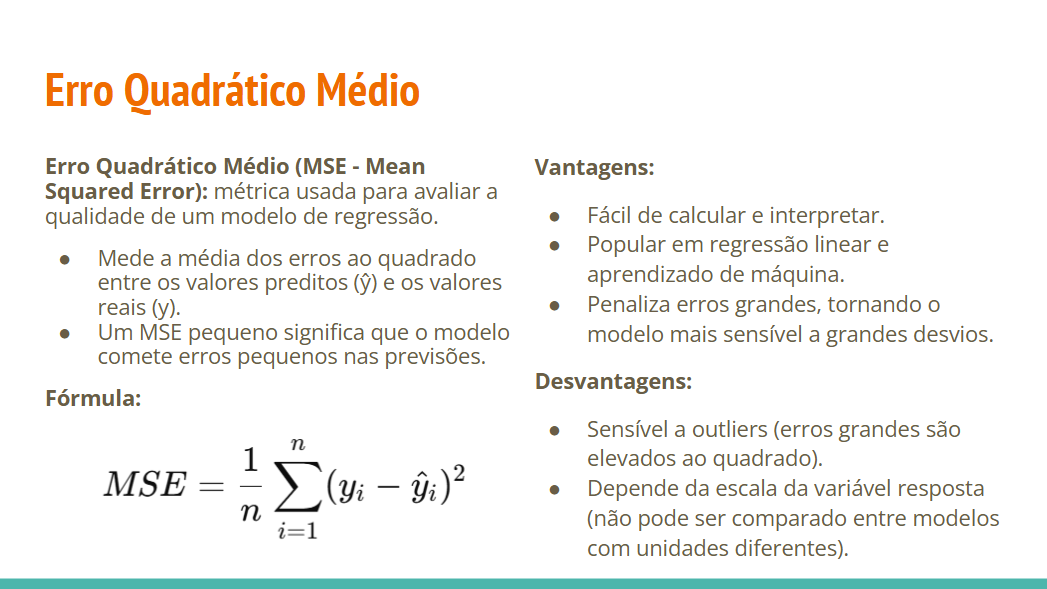

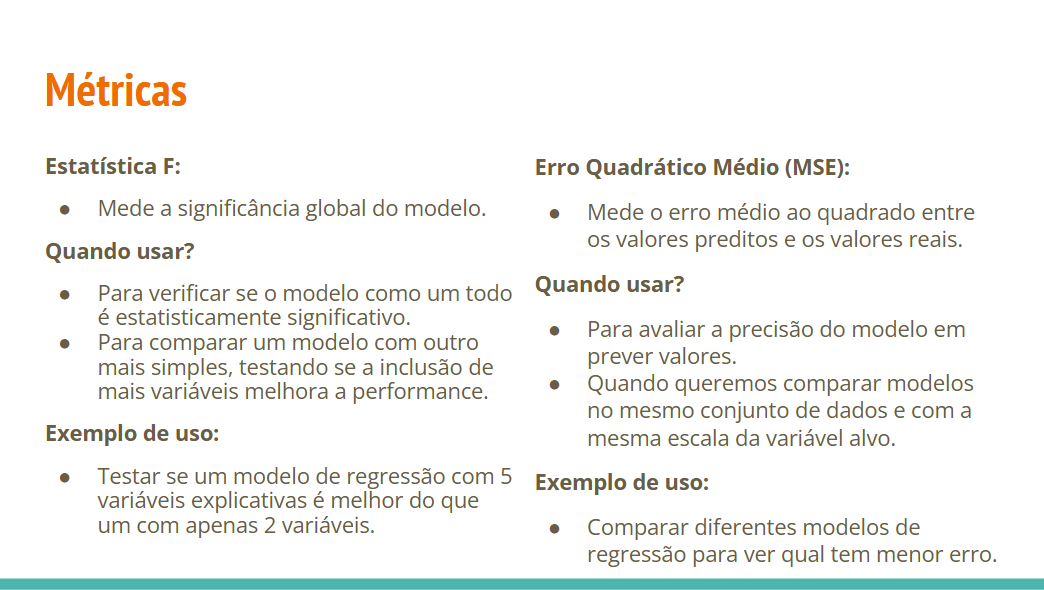

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(test_df)
y_true = test_df['price']

# Calculando o Erro Quadrático Médio
mse = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio: {mse:.2f}")

Erro Quadrático Médio: 68663809665.93


## Visualização

Podemos gerar as previsões para o nosso conjunto teste.

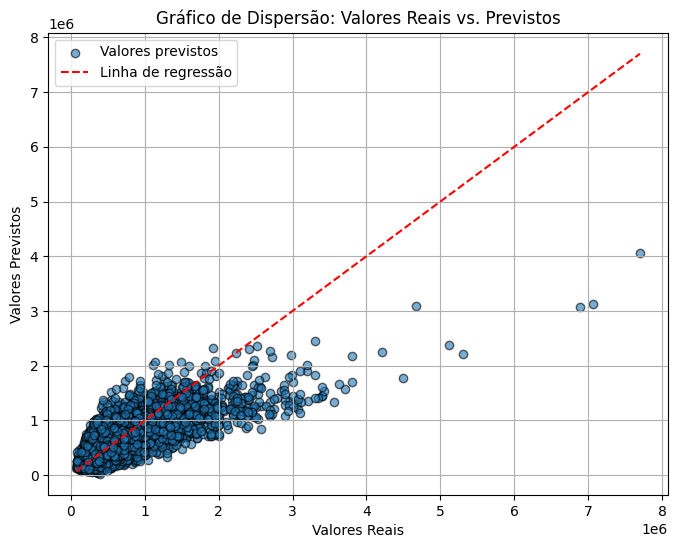

In [ ]:
# Valores reais e previstos
y_real = train_df['price']
y_pred = model.predict(train_df)

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_real, y_pred, alpha=0.6, edgecolors='k', label='Valores previstos')

# Linha de regressão
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--', label='Linha de regressão')

# Personalização do gráfico
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previstos')
plt.legend()
plt.grid(True)

## Exercício

Como estimar o salário dos funcionários de uma empresa? Para este exercício, vamos utilizar o seguinte conjunto de dados do Kaggle: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

Seu objetivo deverá ser o de prever o salário de alguns funcionários da empresa. Para isso, você deve:

*   Importar o conjunto de dados;
*   Gerar estatísticas descritivas;
*   Executar as etapas relevantes do pipeline de tratamento de dados;
*   Codificar as variáveis qualitativas;
*   Separar em treinamento (85%) e teste (15%);
*   Estimar um modelo de regressão;
*   Aplicar transformações logarítmicas, quadráticas e interações entre termos;
*   Prever os valores para o conjunto teste;
*   Plotar um gráfico com os valores preditos e reais.

